# Install modules

In [1]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly

# Import libraries

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Question 1 - Extracting Tesla Stock Data Using yfinance

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on. In this case the symbol for Tesla is `TSLA`.

In [3]:
tesla = yf.Ticker("TSLA")

With the ticker object we extract the stock data using the function `history`. We set the `period` parameter to `max` to get the maximum amount of data and we store it to the variable `tesla_share_info`.

In [4]:
tesla_share_info = tesla.history(period="max")

Reset the index of the `DataFrame` and display the first five rows using the function `head`

In [5]:
tesla_share_info.reset_index(inplace=True)
tesla_share_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

Define an `url` variable to store the locator. Then, download the raw data of the website using the `get` method and then parse it to a `BeautifulSoup` object.

In [6]:
url = "https://companiesmarketcap.com/tesla/revenue/"
url_text = requests.get(url).text
url_html = BeautifulSoup(url_text, 'html.parser')

Create a `DataFrame` named `telsa_revenue` to store the data with the columns `Date`, `Revenue` and `Change`.

In [19]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue", "Change"])

We loop through the rows of the table using the `find_all` method and store the values in separate variables. After some formating is done, we append the variables to the `DataFrame`. Finally, we sort the `DataFrame` in ascending order and display the last five rows of the data.

In [20]:
for row in url_html.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = pd.to_datetime(col[0].find("span").text)
    revenue = float(col[1].text.replace("B", "").replace("$", ""))
    change = col[2].text.replace("%","")

    if not change:
        change = "0"

    change = float(change)

    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue], "Change": [change]})], ignore_index=True)

tesla_revenue = tesla_revenue.sort_values(by="Date").reset_index(drop=True)
tesla_revenue.tail()

,Date,Revenue,Change
19,2020-01-01,5.08,-21.28
20,2021-01-01,6.01,18.09
21,2022-01-01,5.92,-1.39
22,2023-01-01,5.27,-11.04
23,2024-01-01,5.27,0.00


# Question 3 - Extracting GameStop Stock Data Using yfinance

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on. In this case the symbol for Tesla is `GME`.

In [10]:
gamestop = yf.Ticker("GME")

With the ticker object we extract the stock data using the function `history`. We set the `period` parameter to `max` to get the maximum amount of data and we store it to the variable `gamestop_share_info`.

In [11]:
gamestop_share_info = gamestop.history(period="max")

Reset the index of the `DataFrame` and display the first five rows using the function `head`

In [12]:
gamestop_share_info.reset_index(inplace=True)
gamestop_share_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

Define an `url` variable to store the locator. Then, download the raw data of the website using the `get` method and then parse it to a `BeautifulSoup` object.

In [13]:
url = "https://companiesmarketcap.com/gamestop/revenue/"
url_text = requests.get(url).text
url_html = BeautifulSoup(url_text, 'html.parser')

Create a `DataFrame` named `gamestop_revenue` to store the data with the columns `Date`, `Revenue` and `Change`.

In [21]:
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue", "Change"])

We loop through the rows of the table using the `find_all` method and store the values in separate variables. After some formating is done, we append the variables to the `DataFrame`. Finally, we sort the `DataFrame` in ascending order to check everything is fine.

In [22]:
for row in url_html.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = pd.to_datetime(col[0].find("span").text)
    revenue = float(col[1].text.replace("B", "").replace("$", ""))
    change = col[2].text.replace("%","")

    if not change:
        change = "0"

    change = float(change)

    gamestop_revenue = pd.concat([gamestop_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue], "Change": [change]})], ignore_index=True)

gamestop_revenue = gamestop_revenue.sort_values(by="Date").reset_index(drop=True)
gamestop_revenue.tail()

,Date,Revenue,Change
19,2020-01-01,5.08,-21.28
20,2021-01-01,6.01,18.09
21,2022-01-01,5.92,-1.39
22,2023-01-01,5.27,-11.04
23,2024-01-01,5.27,0.00


# Question 5 - Tesla Stock and Revenue Dashboard

Using the `Matplotlib` module we create a plot of the stock price vs. the revenue by year. Since there are less inputs for revenue, we choose to display it as a bar plot.

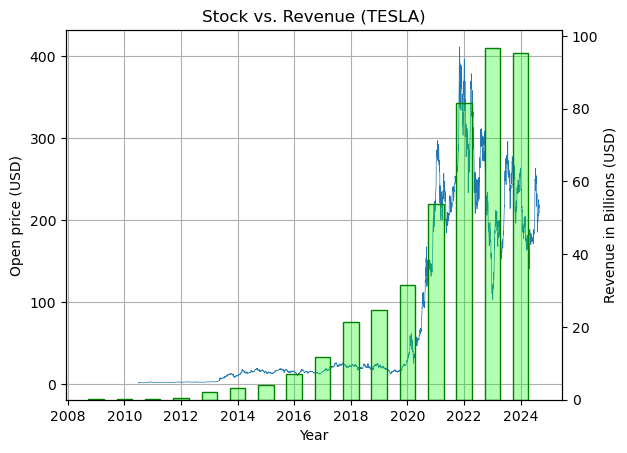

In [16]:
fig, ax1 = plt.subplots()
plt.title("Stock vs. Revenue (TESLA)")

ax1.plot(tesla_share_info["Date"], tesla_share_info["Open"], linewidth=0.5)
plt.ylabel("Open price (USD)")
plt.xlabel("Year")

plt.grid()

ax2_tesla = ax1.twinx()
ax2_tesla.bar(tesla_revenue["Date"], tesla_revenue["Revenue"], color=(0, 1, 0, 0.3), edgecolor=(0, 0.5, 0, 1), width=200)
plt.ylabel("Revenue in Billions (USD)")
plt.xlabel("Year")

plt.grid(axis="x")
plt.show()

# Question 6 - GameStop Stock and Revenue Dashboard

Using the `Matplotlib` module we create a plot of the stock price vs. the revenue by year. Since there are less inputs for revenue, we choose to display it as a bar plot.

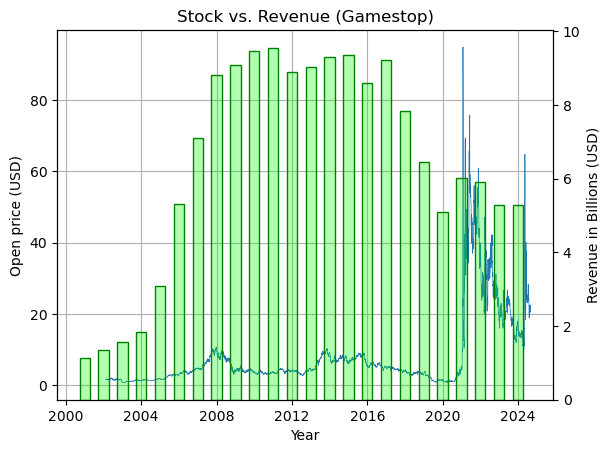

In [17]:
fig, ax1 = plt.subplots()
plt.title("Stock vs. Revenue (Gamestop)")

ax1.plot(gamestop_share_info["Date"], gamestop_share_info["Open"], linewidth=0.5)
plt.ylabel("Open price (USD)")
plt.xlabel("Year")

plt.grid()

ax2 = ax1.twinx()
ax2.bar(gamestop_revenue["Date"], gamestop_revenue["Revenue"], color=(0, 1, 0, 0.3), edgecolor=(0, 0.5, 0, 1), width=200)
plt.ylabel("Revenue in Billions (USD)")
plt.xlabel("Year")

plt.grid(axis="x")
plt.show()